# 環境構築



*   Pythonモジュールへのパス追加





In [1]:
!pwd

/mnt/MachineLearning/NoteBook/NumDropletsRoI/Classification


In [2]:
# import os

# os.chdir("/mnt/MachineLearning")

In [3]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [4]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [4]:
#読み込むデータのパスの設定

# data_path = './data'
# input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

# input_list

In [5]:
#input(空調条件等)の読み込み
# df_input = None

# for input_fname in input_list:
#     df_read = pd.read_csv(input_fname, index_col="case_name")
#     if df_input is None:
#         df_input = df_read
#     else:
#         df_input = pd.concat([df_input, df_read])

# df_input

In [6]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [8]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

# データ取り込み

In [5]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")

df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


In [6]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,case_name,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off
0,office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1
1,office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0
2,office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0
3,office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0
4,office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0
427,office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0
428,office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0
429,office3_960_82_aout,office3,960.0,82.0,5221.2,158.218182,1130.875541,4683.139767,1,0,0


In [7]:
df_total = df_total.set_index('case_name')

In [8]:
# binning
# labels=False: index_labeling
# df_total["n_from2sec/S_bin"] = pd.qcut(df_total["n_from2sec/S"], 4, labels=False)
df_total["countTimeMean_bin"] = pd.qcut(df_total["countTimeMean_sit2stand"], 4, labels=False)

df_total

,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off,countTimeMean_bin
case_name,,,,,,,,,,,
office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1,3
office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0,3
office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0,2
office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0,3
office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0,3
office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0,3
office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0,3


In [9]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [10]:
df_total.std(numeric_only=True)

aircon                     360.876287
ventilation                 83.985694
n_from2sec                 921.844114
n_from2sec/S                36.376848
countTimeMean_sit          219.342164
countTimeMean_sit2stand    758.168789
exhaust_a                    0.495869
exhaust_b                    0.495869
exhaust_off                  0.344132
countTimeMean_bin            1.120371
dtype: float64

In [11]:
from sklearn import preprocessing

#meta(condifion of air)データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249
...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249


In [12]:
# df_ml = df_meta_standardized.join(df_total[["office", "n_from2sec/S", "countTimeMean_sit2stand"]])
df_ml = df_meta_standardized.join(df_total[["office", "countTimeMean_bin"]])
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_bin
case_name,,,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993,office2,3
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249,office2,3
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249,office2,2
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249,office2,3
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249,office2,3
...,...,...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249,office3,3
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249,office3,3
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249,office3,3


In [22]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [18]:
officemodel_path = '/mnt/MachineLearning/Office3DModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

['case1', 'case10', 'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case2', 'case20', 'case21', 'case22', 'case23', 'case24', 'case25', 'case26', 'case27', 'case28', 'case29', 'case3', 'case30', 'case31', 'case32', 'case33', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9']


In [20]:
import importlib

importlib.reload(pco)

<module 'pointCloud_operator' from '/mnt/MachineLearning/modules/pointCloud_operator.py'>

In [ ]:
import pointCloud_operator as pco

pco.readSTL_and_makePointCloudDict(officemodel_path, case_list)


点数memo

- aircon: 580
- airvent: 8
- room: 20
- desks: 1800~1825
- bosy: 約26500

In [13]:
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_separated/dict.npy'

In [14]:
# import numpy as np

# np.save(pcFilePath, pointCloud_dict, allow_pickle='TRUE')

In [15]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()
pointCloud_dict

{'office1': {'aircon': array([[2.5  , 2.25 , 2.6  ],
         [2.5  , 2.375, 2.6  ],
         [2.5  , 2.45 , 2.6  ],
         ...,
         [3.5  , 3.05 , 2.6  ],
         [3.5  , 3.125, 2.6  ],
         [3.5  , 3.25 , 2.6  ]], dtype=float32),
  'airvent': array([[2.825, 1.025, 2.6  ],
         [2.825, 1.375, 2.6  ],
         [2.825, 4.125, 2.6  ],
         [2.825, 4.475, 2.6  ],
         [3.175, 1.025, 2.6  ],
         [3.175, 1.375, 2.6  ],
         [3.175, 4.125, 2.6  ],
         [3.175, 4.475, 2.6  ]], dtype=float32),
  'body': array([[3.098921 , 2.69311  , 0.1438653],
         [1.647102 , 3.116968 , 0.7697402],
         [2.840412 , 1.10439  , 1.45508  ],
         ...,
         [3.304059 , 3.177919 , 1.376374 ],
         [1.310924 , 1.471932 , 0.3961929],
         [3.261433 , 3.166402 , 1.266208 ]], dtype=float32),
  'layout': array([[0.    , 0.    , 0.    ],
         [0.    , 0.    , 2.6   ],
         [0.    , 5.5   , 0.    ],
         ...,
         [1.72  , 3.485 , 0.53  ],
     

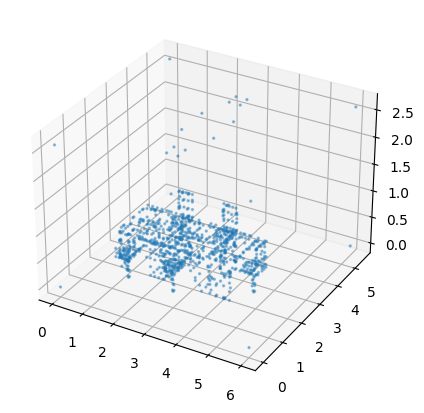

In [17]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office1']['layout'])

In [20]:
# import numpy as np
# '''
# 点群シャッフルによるデータ増強
# よく考えると無意味だと思う
# '''
# rng = np.random.default_rng()

# pointCloud_augumented_dict = {}
# for office_name, pointCloud in sampledPointCloud_dict.items():
#     pc_list = []
#     for i in range(4):
#         pc = pointCloud.copy()

#         if i >= 1:
#             #点群のシャッフル
#             rng.shuffle(pc)

#         pc_list.append(pc)

#     pointCloud_augumented_dict[office_name] = pc_list

# pointCloud_augumented_dict

In [21]:
# plot3d_points(pointCloud_augumented_dict['office10'][0])
# plot3d_points(pointCloud_augumented_dict['office10'][1])
# plot3d_points(pointCloud_augumented_dict['office10'][2])
# plot3d_points(pointCloud_augumented_dict['office10'][3])

In [22]:
# def get_augumented_dataset():
#     '''
#     点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
#     '''
#     case_index_list = list(df_total.index)
#     # case_index_list = list(df_total["casename"])


#     case_index_augumented_list = []

#     pointCloudArray_list = []
#     metaArray_list = []

#     RoI_list = []

#     for case_index in case_index_list:
#         office_name = case_index.split('_', maxsplit=1)[0]
#         pc_list = pointCloud_augumented_dict[office_name]
#         for augumentID, pointCloud in enumerate(pc_list):
#             case_index_augumented_list.append(case_index + '-' + str(augumentID))
#             pointCloudArray_list.append(pointCloud)
#             metaArray_list.append(df_meta_standardized.loc[case_index])
#             # RoI_list.append(df_total["RoI"].loc[case_index])
#             RoI_list.append(df_total["count_timeMean"].loc[case_index])

#     case_index_array = np.array(case_index_augumented_list)
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pointCloudArray = np.array(pointCloudArray_list)
    
#     return case_index_array, pointCloudArray, metaArray, RoIArray

# X_index, X_pc, X_meta, y = get_augumented_dataset()

In [23]:
# def get_officeDataset(officename_list:list, df_core:pd.DataFrame, pointCloud_dict:dict, shuffle:bool):
#     """
#     Return a certain office Dataset.
#     You can specify List of offices.
#     """
    
#     df_main = pd.DataFrame()
    
#     for officename in officename_list:
#         df = df_core[ df_core["office"]==officename ]
#         df_main = pd.concat([df_main, df])
        
#     if shuffle:
#         df_main = df_main.sample(frac=1, random_state=0)
        
#     # meke Dictionary of pointCloudList in order of MainDataFrame
#     pc_list_dict = {"aircon":[], "airvent":[], "body":[], "layout":[], }
#     for officename in df_main["office"]:
#         for key, pc_list in pc_list_dict.items():
#             pc_list.append(pointCloud_dict[officename][key])
            
#     # make input-Dictionary and to ND-Array
#     input_dict = {"meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]]}
#     for key, pc in pc_list_dict.items():
#         input_dict[f"pointCloud_{key}"] = np.array(pc)
                
#     return input_dict, df_main["countTimeMean_sit2stand"]
        

In [23]:
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    layout = auto()


In [41]:
def get_officeDataset(
    officename_list:list,
    df_core:pd.DataFrame,
    pointCloud_dict:dict,
    objective_col:str,
    shuffle:bool,
    standardize_pointCloud=True
):
    """
    Return a certain office Dataset.
    You can specify List of offices.
    """
    
    df_main = pd.DataFrame()
    
    for officename in officename_list:
        df = df_core[ df_core["office"]==officename ]
        df_main = pd.concat([df_main, df])
        
    if shuffle:
        df_main = df_main.sample(frac=1, random_state=0)
        
    # meke Dictionary of pointCloudList in order of MainDataFrame
    pc_list_dict = {part.name:[] for part in OfficePart}
    for officename in df_main["office"]:
        for key, pc_list in pc_list_dict.items():
            pc_list.append(pointCloud_dict[officename][key])
        
    # make input-Dictionary and to ND-Array
    input_dict = {"meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]]}
    for key, pc_list in pc_list_dict.items():
        pc_array = np.array(pc_list)
    
        if standardize_pointCloud:
            pc_array = ( pc_array - pc_array.mean() ) / pc_array.std()
            
        input_dict[f"pointCloud_{key}"] = pc_array
                
    # return input_dict, df_main["countTimeMean_sit2stand"]
    # return input_dict, df_main["n_from2sec/S"]
    return input_dict, df_main[objective_col]
        

In [42]:
X_dict_sample, y_sample = get_officeDataset(
    list(df_ml["office"].unique()),
    df_ml, pointCloud_dict, "countTimeMean_bin",
    standardize_pointCloud=True,
    shuffle=True
)

In [43]:
X_dict_sample

{'meta':                         aircon  ventilation  exhaust_a  exhaust_b  exhaust_off
 case_name                                                                     
 office6_0_246_aout   -1.384552     1.265523   1.147695  -0.871311    -0.398249
 office5_660_0         0.446455    -1.666952  -0.871311  -0.871311     2.510993
 office15_960_82_aout  1.278731    -0.689460   1.147695  -0.871311    -0.398249
 office4_660_82_bout   0.446455    -0.689460  -0.871311   1.147695    -0.398249
 office2_360_246_aout -0.385821     1.265523   1.147695  -0.871311    -0.398249
 ...                        ...          ...        ...        ...          ...
 office10_0_246_bout  -1.384552     1.265523  -0.871311   1.147695    -0.398249
 office4_360_82_bout  -0.385821    -0.689460  -0.871311   1.147695    -0.398249
 office1_960_246_aout  1.278731     1.265523   1.147695  -0.871311    -0.398249
 office15_660_82_aout  0.446455    -0.689460   1.147695  -0.871311    -0.398249
 office6_960_0         1.278731 

In [44]:
y_sample

case_name
office6_0_246_aout      0
office5_660_0           1
office15_960_82_aout    0
office4_660_82_bout     2
office2_360_246_aout    0
                       ..
office10_0_246_bout     3
office4_360_82_bout     2
office1_960_246_aout    0
office15_660_82_aout    2
office6_960_0           2
Name: countTimeMean_bin, Length: 431, dtype: int64

In [45]:
y_sample.nunique()

4

In [46]:
import sys

def standardization_test(name:str, X:np.ndarray):
    """
    標準化されているかをテスト
    """
    threshold = 1.e-5
    
    if abs(X.mean()) > threshold:
        sys.stderr.write(f'StandardizationError: {name}_mean= {X.mean()}\n')
        
    if abs(X.std() - 1.) > threshold:
        sys.stderr.write(f'StandardizationError: {name}_std= {X.std()}\n')
        

In [47]:
# print(X_officename.shape)

for key, value in X_dict_sample.items():
    if key == "meta":
        for column_name, item in value.iteritems():
            X = item.values
            standardization_test(column_name, X)
            print(column_name)
            print(X.shape, X.mean(), X.std())
        
    else:
        X = value
        
        standardization_test(key, X)
        
        print(key)
        print(X.shape, X.mean(), X.std())
    
# print(X_meta.shape, X_meta.mean(), X_meta.var())

# print(y.shape, y.mean(), y.var())

aircon
(431,) 5.976142499142374e-17 1.0
ventilation
(431,) 1.772235361814635e-16 0.9999999999999999
exhaust_a
(431,) -4.12147758561543e-17 0.9999999999999999
exhaust_b
(431,) -2.472886551369258e-17 0.9999999999999998
exhaust_off
(431,) -2.2668126720884866e-17 1.0
pointCloud_aircon
(431, 580, 3) -5.2803705e-07 0.9999999
pointCloud_airvent
(431, 8, 3) -1.05472104e-07 0.99999994
pointCloud_body
(431, 2048, 3) 1.0649778e-07 0.99999994
pointCloud_layout
(431, 1024, 3) -2.997058e-07 0.9999999


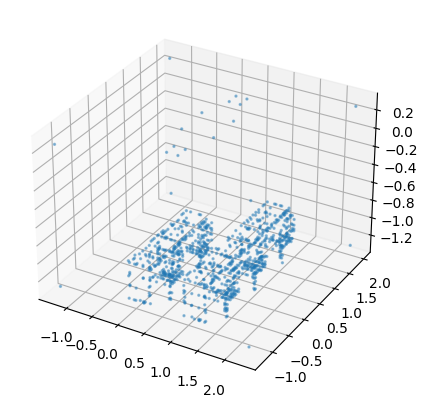

In [50]:
plot3d_points(X_dict_sample["pointCloud_layout"][0, :,:])

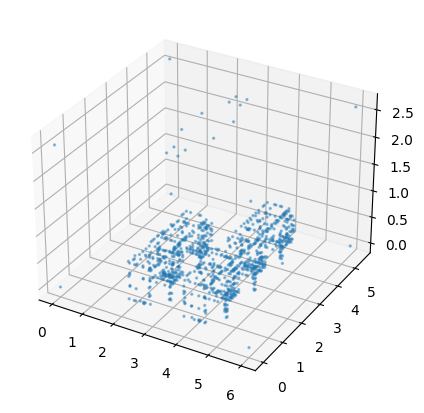

In [52]:
plot3d_points(pointCloud_dict["office6"]["layout"])

# チューニング

In [169]:
# office_list = list(df_total["office"].unique())
# # office_list = ["office1", "office2", "office3", "office4", "office5", "office6", ]

# office_list

In [160]:
# test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]
test_office_list = ["office1", "office7", "office10", "office16", "office28", ]
# test_office_list = office_list

test_office_list

['office1', 'office7', 'office10', 'office16', 'office28']

In [170]:
idealOffice_list = []

for office in office_list:
    df_office = df_total[df_total["office"]==office]
    if df_office["countTimeMean_bin"].nunique() == 4:
        idealOffice_list.append(office)
        

office_list = idealOffice_list
office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office16',
 'office7',
 'office10',
 'office28',
 'office5']

In [37]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12977095142919276741
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739763712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12932115773935301294
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-12-22 03:12:04.786663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9288 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [38]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [68]:
from tensorflow import keras
import PointNet

def myPointNet(trial, input_pointCloud:keras.Input):
        
    hp_conv_layers = trial.suggest_int('conv_layers', 1, 3, step=1)
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters-{i}', 32, 256, step=32)
        
        x = PointNet.conv_bn(x, hp_filters)
        
#         x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
#         x = keras.layers.BatchNormalization(momentum=0.99)(x)       
#         x = keras.layers.ReLU()(x)
    
    return keras.layers.GlobalMaxPooling1D()(x)

In [162]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/classification_countTimeMean_ideal_accObjective.db'


def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    
    input_list = []
    features_list = []
    for key, value in X_dict_sample.items():
        if key == "meta":
            # MetaData
            input_meta = keras.Input(shape=(len(value.columns), ), name='meta')
            
            # append metaData to input_list
            input_list.append(input_meta)

            # append metaData to features_list
            features_list.append(input_meta)
            
        elif key == "pointCloud":
            # PointCloud
            input_pc = keras.Input(shape=(value.shape[1], 3), name=key)

            # append pointClouds to input_list
            input_list.append(input_pc)

            # append feturesOfPointClouds to features_list
            features_list.append(myPointNet(trial, input_pointCloud=input_pc))
        
    
    x = keras.layers.Concatenate()(features_list)
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    x = keras.layers.Dense(y_sample.nunique())(x)
    outputs = keras.layers.Softmax()(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_list, outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        # loss='mse',
        # metrics=['mae'],
        loss='sparse_categorical_crossentropy',
        metrics=["sparse_categorical_accuracy"],
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, fit_office_list, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    print("*** clear_session() occured ! ***")
    
    acc_min_list = []
    for val_office in val_office_list:
        
        train_office_list = [office for office in fit_office_list if office != val_office]
    
        X_dict_train, y_train = get_officeDataset(train_office_list, 
                                                  df_ml, pointCloud_dict, "countTimeMean_bin",
                                                  standardize_pointCloud=True, shuffle=True)
        X_dict_val, y_val = get_officeDataset([val_office],
                                              df_ml, pointCloud_dict, "countTimeMean_bin",
                                              standardize_pointCloud=True, shuffle=False)
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32, 64, 128])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_dict_train, y_train,
            validation_data = (X_dict_val, y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            # callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            callbacks = [EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.0, patience=10)],
            verbose=False,
        )

        #履歴の最後の１０エポック
        # val_loss_list = history.history['val_loss'][-10:] #List of MSE
        val_acc_list = history.history['val_sparse_categorical_accuracy'][-10:] #List of Accuracy
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        # mse_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
        acc_min = np.max(val_acc_list) #終盤のaccのmin（振動抑制が目的）
        acc_min_list.append(acc_min)
        
        print("(train, val): ", ([s.replace('office', '') for s in train_office_list], val_office), acc_min)

    #交差検証の結果の平均値を目的関数
    return np.mean(acc_min_list)#, np.mean(mse_min_list)


db_path

'/mnt/MachineLearning/OptunaLog/classification_countTimeMean_ideal.db'

In [183]:
"""
最終テスト用オフィスを切り替えながらチューニング実行
"""

for test_office in test_office_list:
    print("test_office:", test_office)
    
    study_name = test_office + '_is_test'
    
    fit_office_list = [office for office in idealOffice_list if office != test_office]
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    #============= OPTUNA Optimization with RandomSampler =======================
    
    study = optuna.create_study(
        sampler=optuna.samplers.RandomSampler(),
        direction='maximize',#'minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )

    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )
    
    #=========================================================================
    
    
    #============= OPTUNA Optimization with TPESampler =======================
    
    study = optuna.create_study(
        sampler=optuna.samplers.TPESampler(),
        direction='maximize',#'minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )
    
    #=========================================================================


SyntaxError: invalid syntax (756044919.py, line 18)

In [ ]:
"""
最終テストをオフィス10に絞ってチューニング実行
"""

test_office = "office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

# 3. Create a study object and optimize the objective function.
# study = optuna.create_study(direction='minimize')
study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

study.optimize(
    lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
    n_trials=200,
    gc_after_trial=True
)


# チューニング結果確認

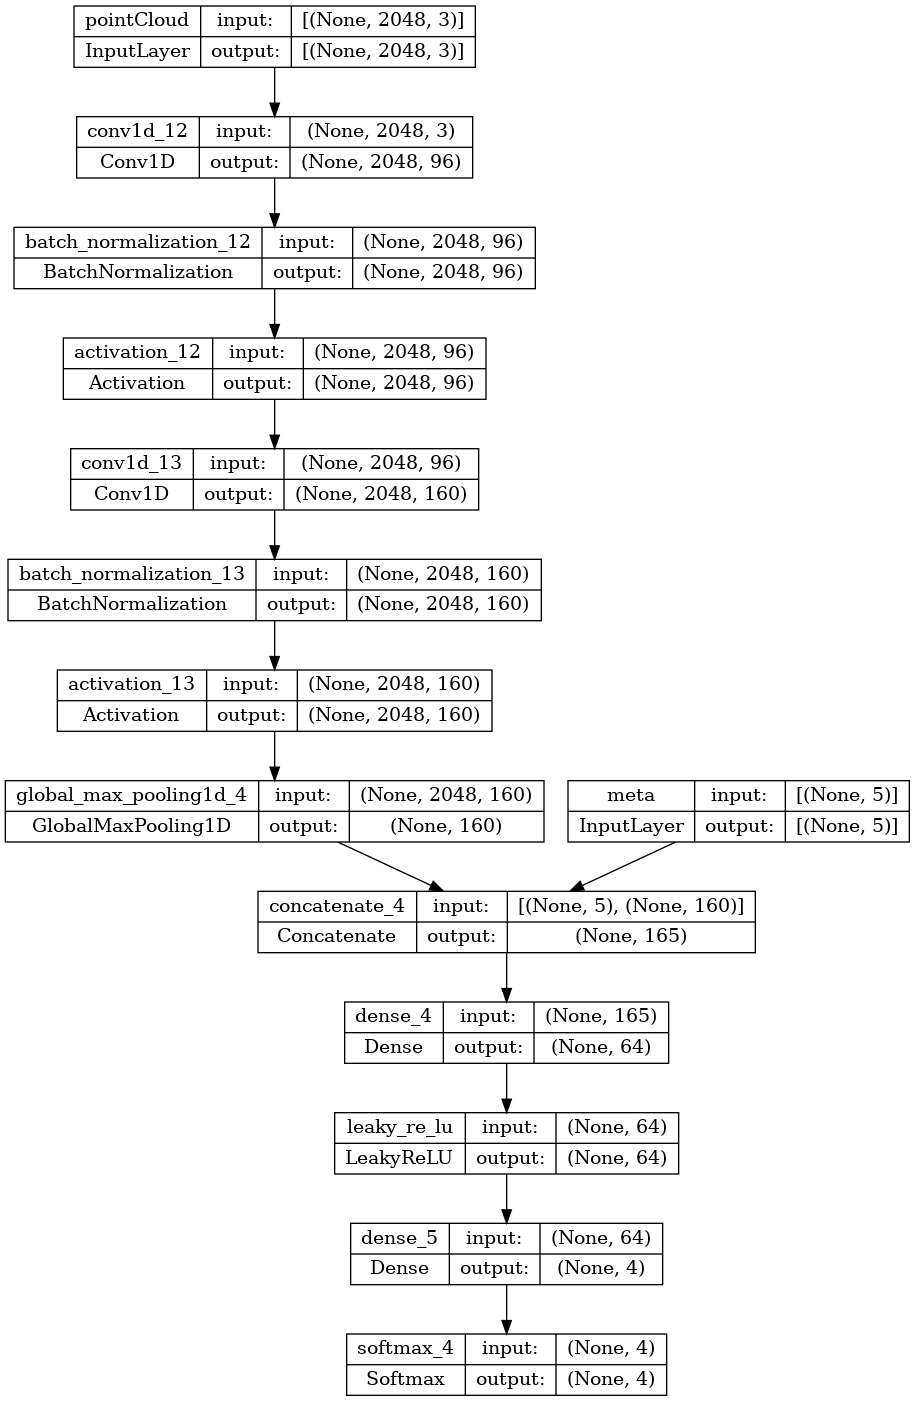

In [166]:
loaded_study = optuna.load_study(study_name='office10_is_test', storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)
keras.utils.plot_model(best_model, show_shapes=True)

In [167]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss(MSE)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

    acc_df = history_df[["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0., 1.)
    plt.show()

## チューニングの再現

In [178]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    
    fit_office_list = [office for office in office_list if office != test_office]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    val_office = val_office_list[0]

    train_office_list = [office for office in fit_office_list if office != val_office]
    
    X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict,
                                              objective_col="countTimeMean_bin", shuffle=True)
    X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_bin", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221225-073120
test_office: office1
Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud (InputLayer)        [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_41 (Conv1D)             (None, 2048, 64)     256         ['pointCloud[0][0]']             
                                                                                                  
 batch_normalization_41 (BatchN  (None, 2048, 64)    256         ['conv1d_41[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activa

In [179]:
tb_log_dir

'/mnt/MachineLearning/tblogs/20221225-073120'

In [180]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [181]:
%tensorboard  --logdir $tb_log_dir

Best trial (test for office1):
  Value: 1.0864665508270264
  Params: 
    batch_size: 128
    conv_layers: 3
    dense_layers: 0
    filters-0: 64
    filters-1: 96
    filters-2: 96
    lr: 0.07269473124284401


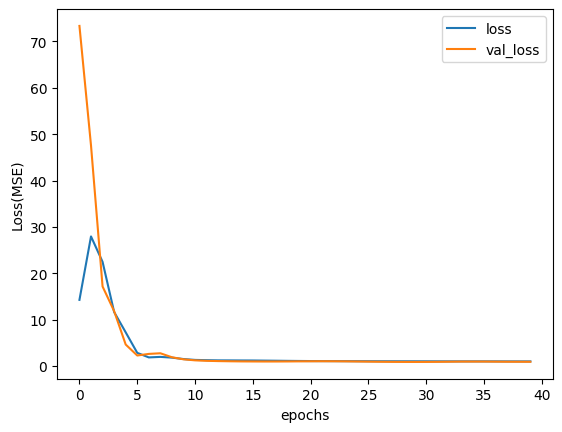

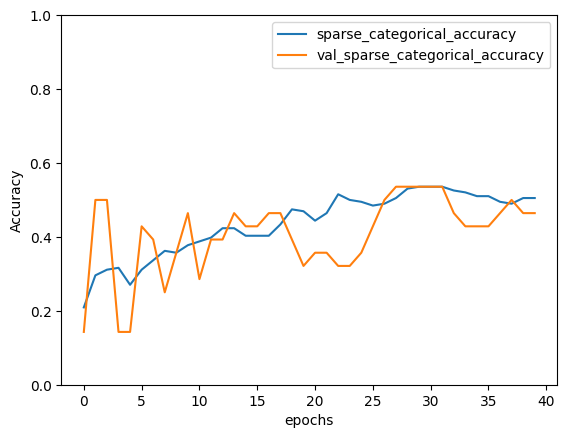

Best trial (test for office7):
  Value: 1.0082336962223053
  Params: 
    activation: ReLU
    batch_size: 4
    conv_layers: 2
    dense_layers: 3
    dropout: 0.5
    filters-0: 160
    filters-1: 32
    lr: 0.0014484281986575592
    units-0: 320
    units-1: 320
    units-2: 64


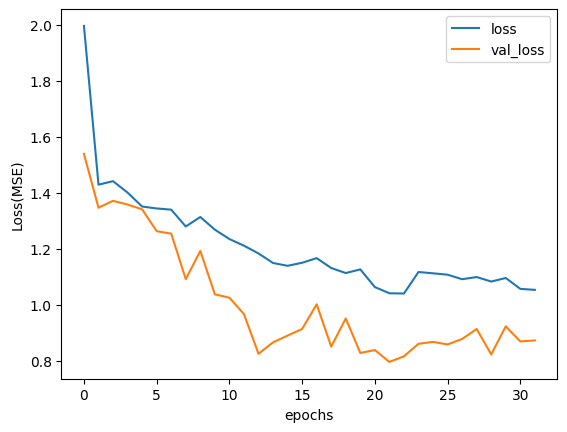

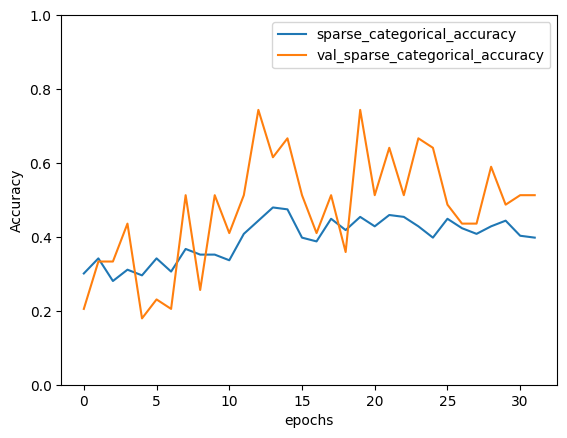

Best trial (test for office10):
  Value: 0.9904434680938721
  Params: 
    activation: LeakyReLU
    batch_size: 16
    conv_layers: 2
    dense_layers: 1
    dropout: None
    filters-0: 96
    filters-1: 160
    lr: 0.05825224500218426
    units-0: 64


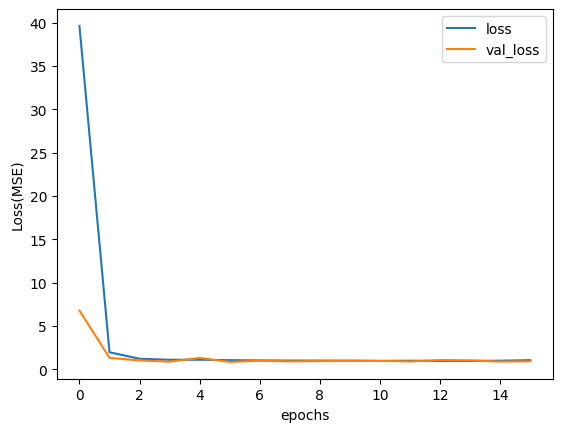

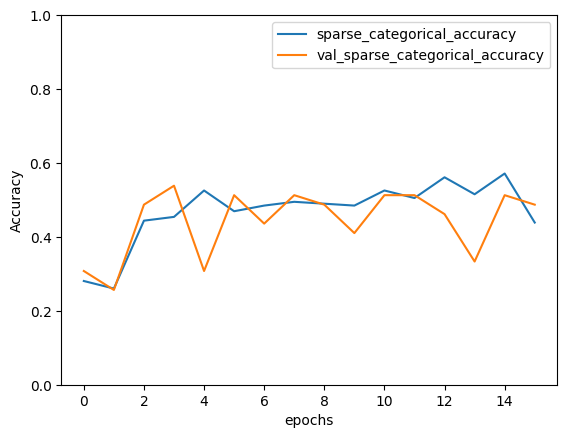

Best trial (test for office16):
  Value: 1.0381510853767395
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 2
    dense_layers: 2
    dropout: 0.3
    filters-0: 64
    filters-1: 32
    lr: 0.012798221389986274
    units-0: 320
    units-1: 384


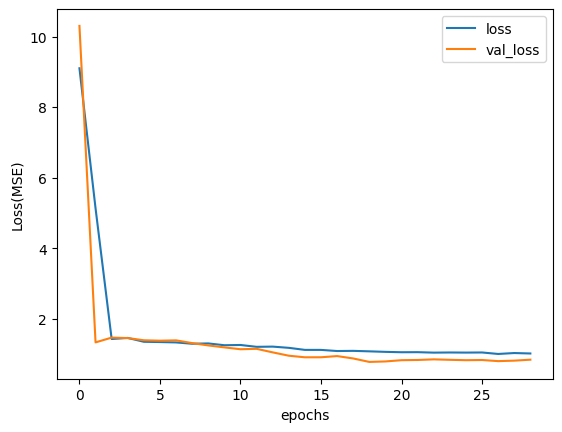

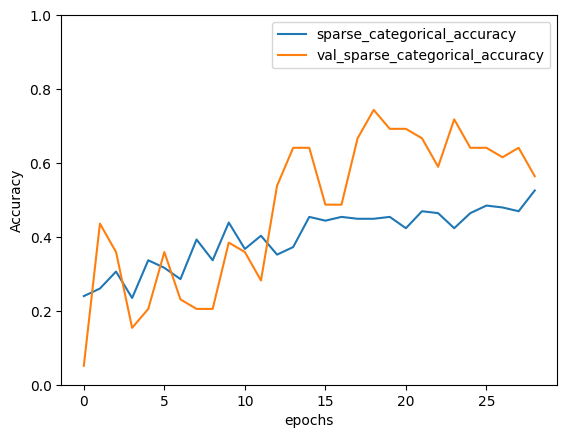

Best trial (test for office28):
  Value: 1.0151870250701904
  Params: 
    activation: LeakyReLU
    batch_size: 128
    conv_layers: 3
    dense_layers: 2
    dropout: 0.5
    filters-0: 96
    filters-1: 160
    filters-2: 96
    lr: 0.004656165009230772
    units-0: 512
    units-1: 128


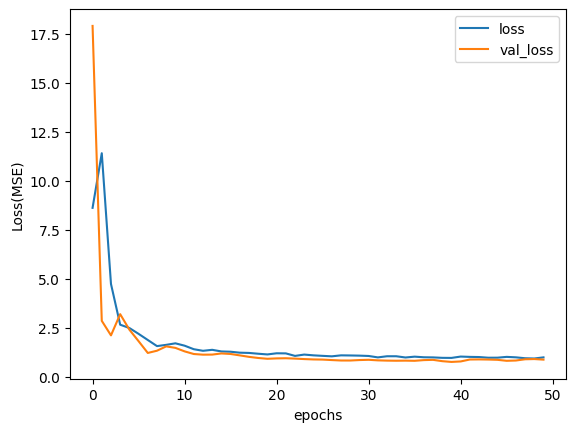

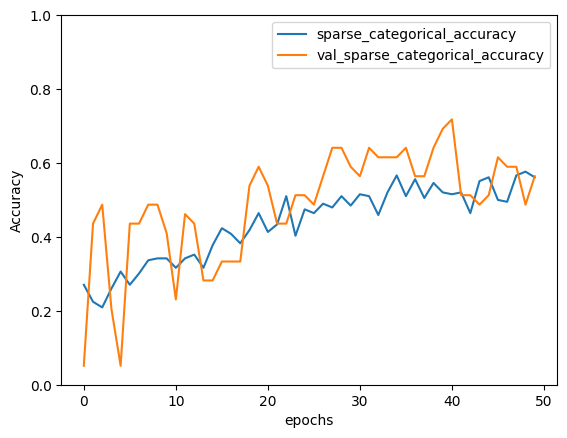

In [182]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

## 最終テスト

In [176]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_office_list = [office for office in office_list if office != test_office]
    
    X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_bin", shuffle=True)
    X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                            objective_col="countTimeMean_bin", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


test_office: office1
Epoch 1/200
2/2 [==============================] - 1s 314ms/step - loss: 16.3051 - sparse_categorical_accuracy: 0.2634 - val_loss: 178.6595 - val_sparse_categorical_accuracy: 0.2051
Epoch 2/200
2/2 [==============================] - 0s 47ms/step - loss: 32.0422 - sparse_categorical_accuracy: 0.2188 - val_loss: 39.5628 - val_sparse_categorical_accuracy: 0.2051
Epoch 3/200
2/2 [==============================] - 0s 62ms/step - loss: 14.5976 - sparse_categorical_accuracy: 0.3348 - val_loss: 12.7865 - val_sparse_categorical_accuracy: 0.4872
Epoch 4/200
2/2 [==============================] - 0s 49ms/step - loss: 6.5381 - sparse_categorical_accuracy: 0.3661 - val_loss: 7.1771 - val_sparse_categorical_accuracy: 0.0513
Epoch 5/200
2/2 [==============================] - 0s 50ms/step - loss: 4.3787 - sparse_categorical_accuracy: 0.2455 - val_loss: 3.2353 - val_sparse_categorical_accuracy: 0.0513
Epoch 6/200
2/2 [==============================] - 0s 62ms/step - loss: 2.0580 - 

Best trial (test for office1):
  Value: 1.0864665508270264
  Params: 
    batch_size: 128
    conv_layers: 3
    dense_layers: 0
    filters-0: 64
    filters-1: 96
    filters-2: 96
    lr: 0.07269473124284401


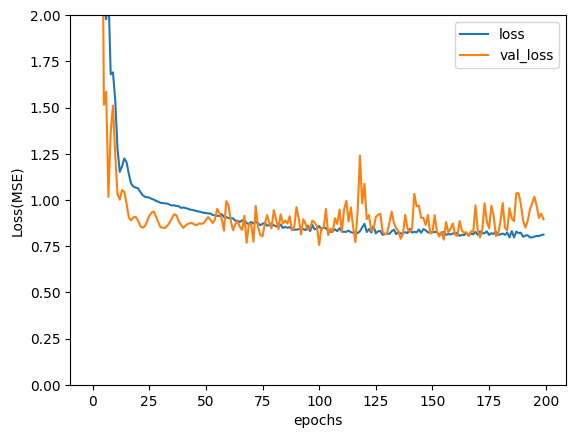

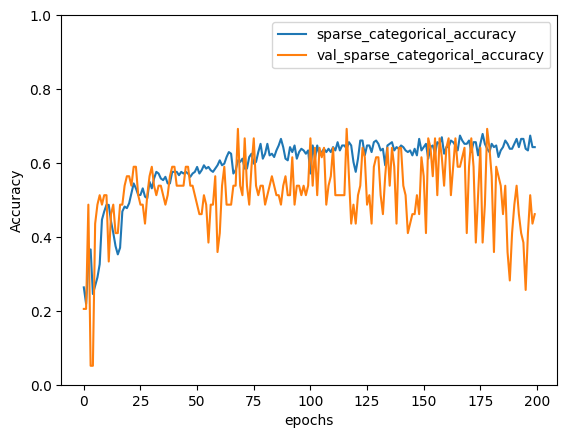

Best trial (test for office7):
  Value: 1.0082336962223053
  Params: 
    activation: ReLU
    batch_size: 4
    conv_layers: 2
    dense_layers: 3
    dropout: 0.5
    filters-0: 160
    filters-1: 32
    lr: 0.0014484281986575592
    units-0: 320
    units-1: 320
    units-2: 64


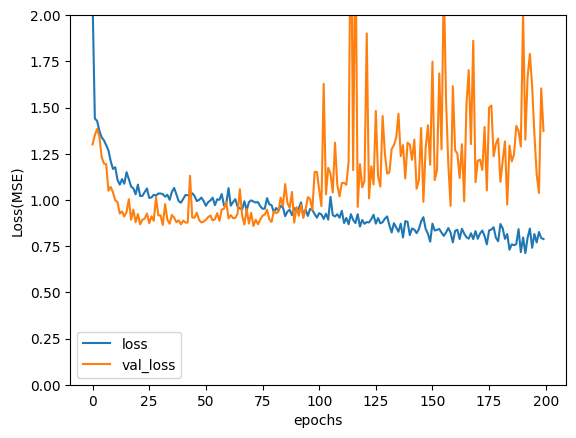

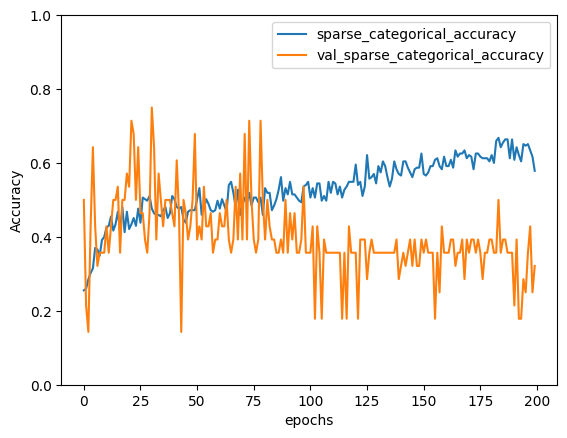

Best trial (test for office10):
  Value: 0.9904434680938721
  Params: 
    activation: LeakyReLU
    batch_size: 16
    conv_layers: 2
    dense_layers: 1
    dropout: None
    filters-0: 96
    filters-1: 160
    lr: 0.05825224500218426
    units-0: 64


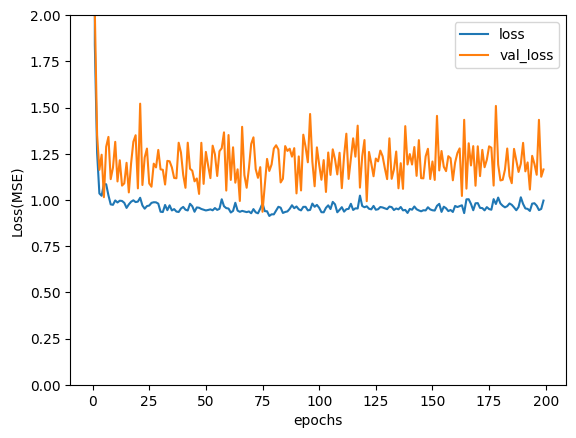

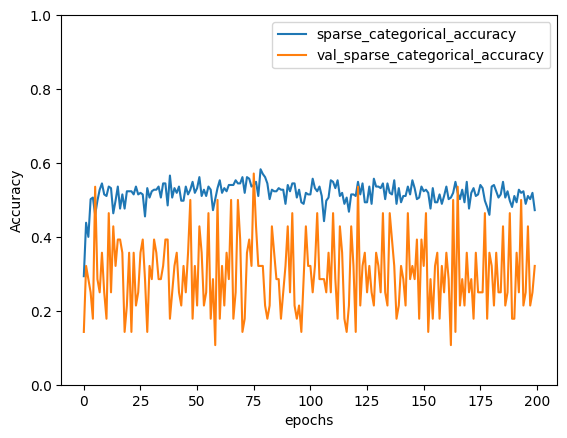

Best trial (test for office16):
  Value: 1.0381510853767395
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 2
    dense_layers: 2
    dropout: 0.3
    filters-0: 64
    filters-1: 32
    lr: 0.012798221389986274
    units-0: 320
    units-1: 384


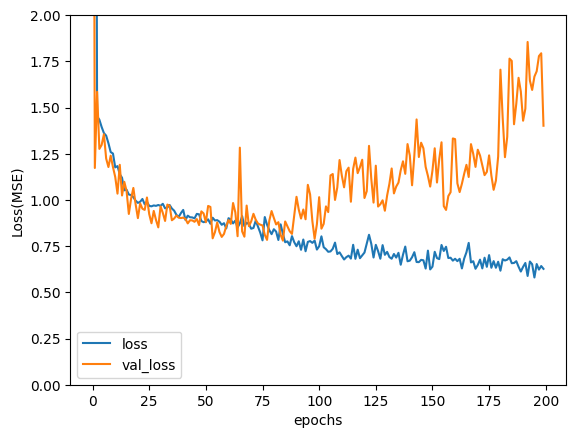

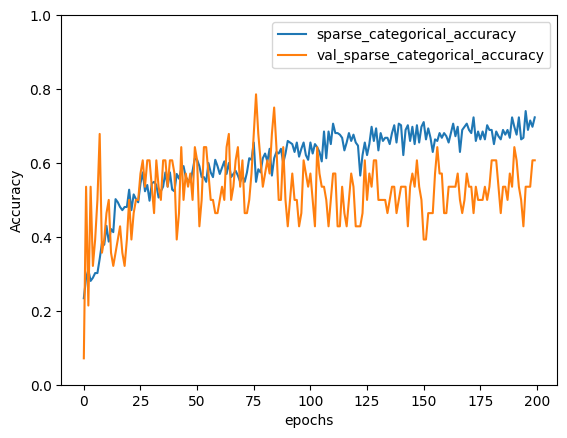

Best trial (test for office28):
  Value: 1.0151870250701904
  Params: 
    activation: LeakyReLU
    batch_size: 128
    conv_layers: 3
    dense_layers: 2
    dropout: 0.5
    filters-0: 96
    filters-1: 160
    filters-2: 96
    lr: 0.004656165009230772
    units-0: 512
    units-1: 128


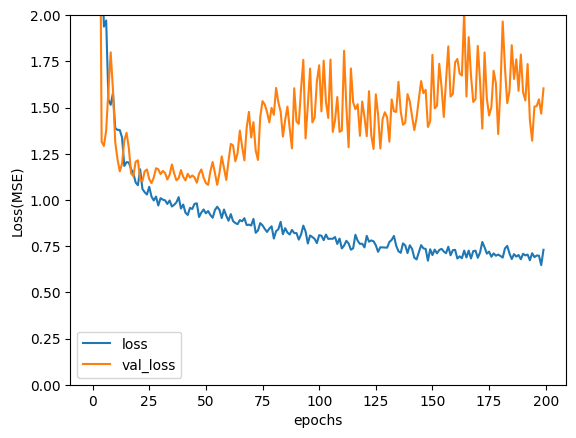

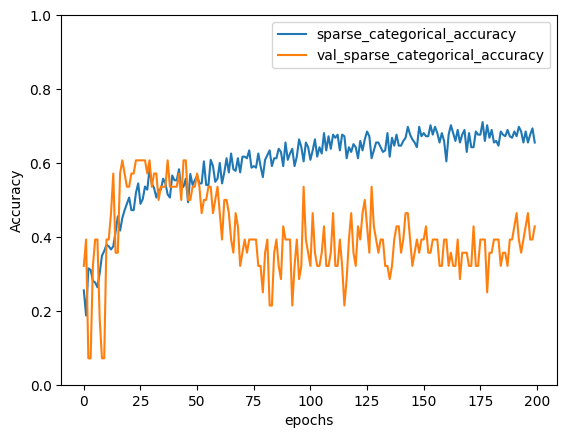

In [177]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=2.)

In [147]:
"""
最終テスト
only office10
"""

test_office="office10"

print("test_office:", test_office)
fit_office_list = [office for office in office_list if office != test_office]
    
X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_bin", shuffle=True)
X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_bin", shuffle=False)

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

test_history = best_model.fit(
    X_dict_fit, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = (X_dict_test, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
)



test_office: office10
Epoch 1/200
4/4 [==============================] - 1s 74ms/step - loss: 10.8042 - sparse_categorical_accuracy: 0.2357 - val_loss: 10.5178 - val_sparse_categorical_accuracy: 0.1071
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 7.5312 - sparse_categorical_accuracy: 0.2457 - val_loss: 2.4806 - val_sparse_categorical_accuracy: 0.2500
Epoch 3/200
4/4 [==============================] - 0s 18ms/step - loss: 2.9165 - sparse_categorical_accuracy: 0.2928 - val_loss: 3.2021 - val_sparse_categorical_accuracy: 0.1429
Epoch 4/200
4/4 [==============================] - 0s 17ms/step - loss: 1.9828 - sparse_categorical_accuracy: 0.3846 - val_loss: 2.3932 - val_sparse_categorical_accuracy: 0.1071
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 1.6095 - sparse_categorical_accuracy: 0.3821 - val_loss: 1.7381 - val_sparse_categorical_accuracy: 0.1071
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 1.3942 - spars

  Value: 1.2087711811065673
  Params: 
    batch_size: 128
    conv_layers: 2
    dense_layers: 0
    filters-0: 32
    filters-1: 32
    lr: 0.09895876709162278


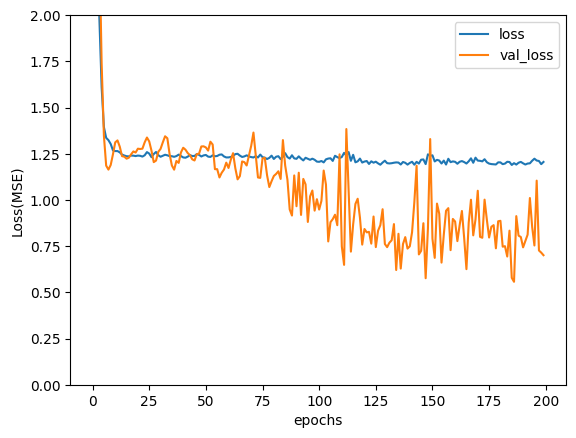

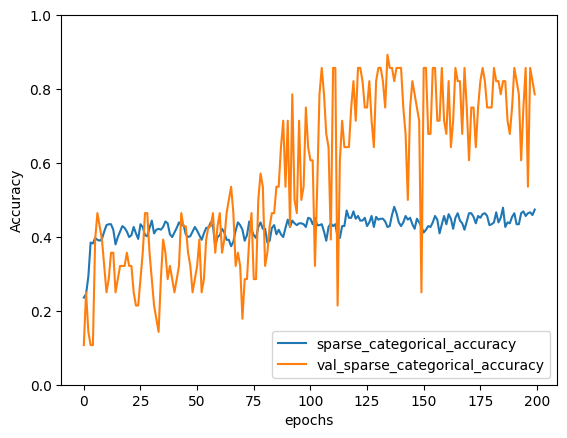

In [148]:
print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

plot_history(test_history.history, ymax=2.)

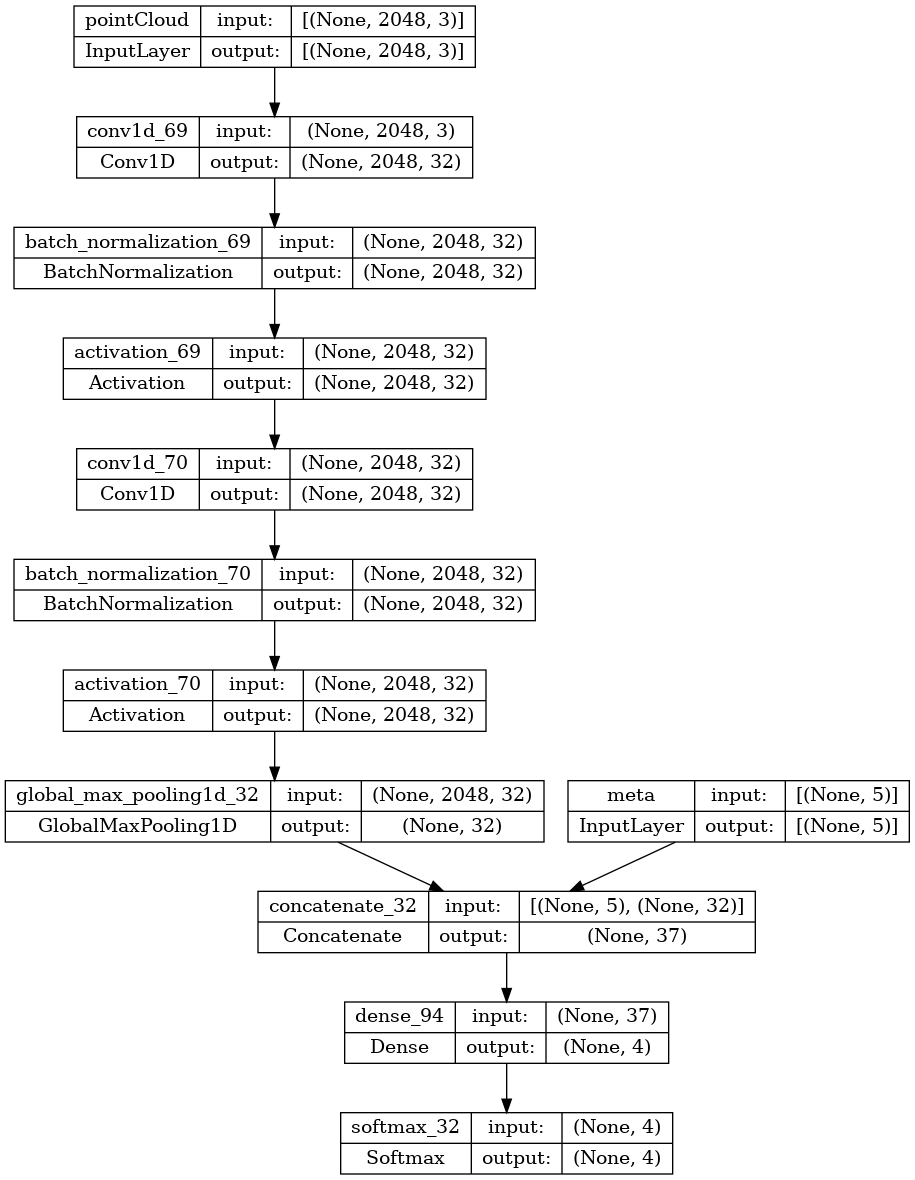

In [149]:
keras.utils.plot_model(best_model, show_shapes=True)

In [150]:
y_fit_pred_softmax = best_model.predict(X_dict_fit)
y_test_pred_softmax = best_model.predict(X_dict_test)

1/1 [==============================] - 0s 20ms/step


In [151]:
y_test.values

array([2, 3, 2, 3, 3, 3, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [152]:
y_test_pred = y_test_pred_softmax.argmax(axis=1)
y_test_pred

array([3, 3, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [153]:
result_df = pd.DataFrame({"correct":y_test, "predict":y_test_pred})
result_df["match"] = (result_df["correct"] == result_df["predict"])
result_df

,correct,predict,match
case_name,,,
office10_0_0,2,3,False
office10_0_164_aout,3,3,True
office10_0_164_bout,2,3,False
office10_0_246_aout,3,2,False
office10_0_246_bout,3,3,True
office10_0_82_aout,3,0,False
office10_0_82_bout,2,0,False
office10_360_0,0,0,True
office10_360_164_aout,0,0,True


In [343]:
def show_office_residual_plot(train_x, train_y, test_x, test_y, office_array, figsize=[10, 8]):
    xlim = [min(min(train_x), min(test_x))-5, max(max(train_x), max(test_x))+5]
    fig= plt.figure(figsize=figsize)

    plt.figure(figsize=[10, 8])

    #カラーマップ等の準備
    markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
    colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
              "orange", "yellow", "crimson", "goldenrod", "orchid", "khaki", "darkgray")

    idx = 0
    for target_office_name in np.unique(office_list):
        if target_office_name == "office10":
            continue
            
        target_office_index = [i for i in range(len(office_array)) if target_office_name+"_" in office_array[i]]
        print(target_office_name, len(target_office_index))
        
        plt.scatter(train_x[target_office_index], train_y[target_office_index], 
                    s=80, c=colors[idx], marker=markers[2], edgecolor="white", label="Training:"+target_office_name)
        
        idx+=1
        
    plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc="best")
    plt.hlines(y=0, xmin=xlim[0], xmax=xlim[1], color="black", lw=2)
    plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

In [344]:
y_fit.to_numpy().shape

(140,)

In [ ]:
X_dict_fit["meta"].index

In [ ]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.to_numpy().reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.to_numpy().reshape((-1,1)), 
                            office_array=X_dict_fit["meta"].index
                                  )

In [133]:
X_dict_fit

{'meta': array([[-1.38455178,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        [-1.38455178,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        ...,
        [ 0.44645519,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108, -0.68946029, -0.87131147,  1.14769521, -0.39824886],
        [ 0.44645519, -1.66695169, -0.87131147, -0.87131147,  2.51099278]]),
 'pointCloud_aircon': array([[[ 1.3765091 , -2.0106473 , -0.52029866],
         [ 1.3765091 , -1.8412895 , -0.52029866],
         [ 1.3765091 , -1.7396748 , -0.52029866],
         ...,
         [ 2.7313716 , -0.92675734, -0.52029866],
         [ 2.7313716 , -0.8251426 , -0.52029866],
         [ 2.7313716 , -0.6557848 , -0.52029866]],
 
        [[-0.6557848 , -0.99450046, -0.52029866],
         [-0.6557848 , -0.8251426 , -0.52029866],
         [-0.6557848 , -0.72352785, -0.52029866],
         ...,
         [ 0.6990778 ,  0

In [85]:
df_total

,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off,n_from2sec/S_bin,countTimeMean_bin
case_name,,,,,,,,,,,,
office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1,3,3
office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0,3,3
office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0,2,2
office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0,3,3
office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0,1,3
office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0,0,3
office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0,0,3


In [94]:
def plot_RoI_level(classification_level):
    #オフィスごとのRoI_levelをカウントしてみる
    unique_office = np.unique(office_list)
    num_RoI_level = np.zeros((len(unique_office), classification_level))#ラベルのカウント数を保存するリスト

    #各オフィスにアクセスするループ
    count = 0#ループの回数をカウントする
    for selected_office in unique_office:
        df_selected_office = df_total[df_total["office"]==selected_office]
        #各ラベルの個数カウント
        for i in range(classification_level):
            num_RoI_level[count, i] = (df_selected_office['countTimeMean_bin'] == i).sum()

        count += 1


    #グラフの描画
    colors = ("steelblue", "limegreen", "gold","orange","crimson")
    plt.figure(figsize=[12, 8]) 
    virtical = num_RoI_level#縦軸の値
    horizontal = np.arange(unique_office.shape[0])#横軸の値
    for level in range(classification_level):
        plt.bar(x=horizontal, height=virtical[:, level], tick_label=unique_office, bottom=virtical[:, :level].sum(axis=1), color=colors[level])

    plt.ylabel("count")
    plt.xlabel("office name")
    plt.legend(np.arange(classification_level), loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()

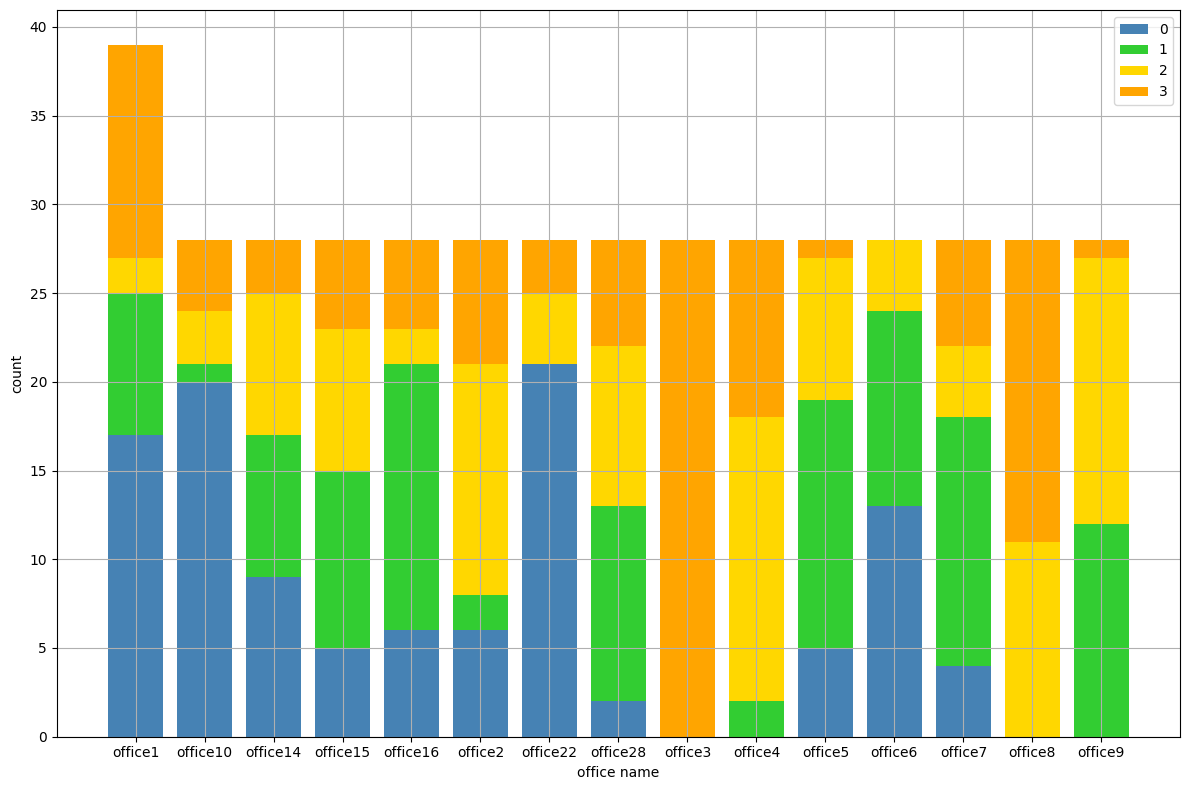

In [95]:
plot_RoI_level(4)

In [78]:
import gc
 
gc.collect()

8887

In [79]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()